# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
import scipy.io
mat = scipy.io.loadmat('data/ejer_1_data1.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [5]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat["X"],columns=["x1","x2"])
df["target"] = mat["y"]

In [7]:
df

,x1,x2,target
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


#### 4. Plot a scatterplot with the data

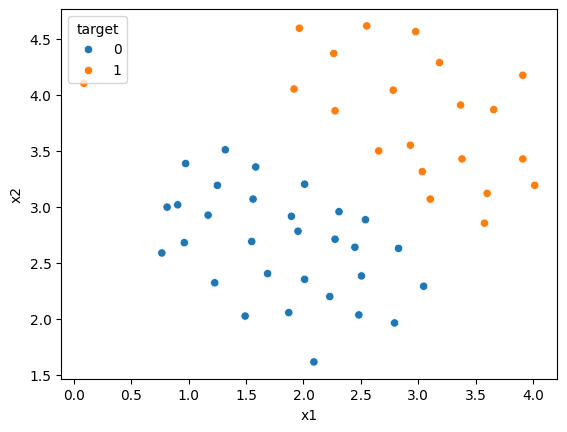

In [10]:
ax = sns.scatterplot(data = df, x='x1', y='x2', c='green', hue="target")

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lin_svc = LinearSVC(C = 1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [ ]:
X = df[["x1","x2"]]
y = df["target"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
lin_svc.fit(X,y)

LinearSVC(C=1, loss='hinge', max_iter=10000)

In [ ]:
accuracy = lin_svc.score(X_scaled, y)
print("Accuracy:", accuracy)

Accuracy: 0.5882352941176471


c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
# Convert to unscaled parameters
b1 = lin_svc.decision_function([-scaler.mean_ / scaler.scale_])
w1 = lin_svc.coef_[0] / scaler.scale_
lin_svc.intercept_ = np.array([b1])
lin_svc.coef_ = np.array([w1])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
lin_svc.support_vectors_ = X[support_vectors_idx1]

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\inilo\AppData\Local\Temp\ipykernel_37260\3523636880.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()


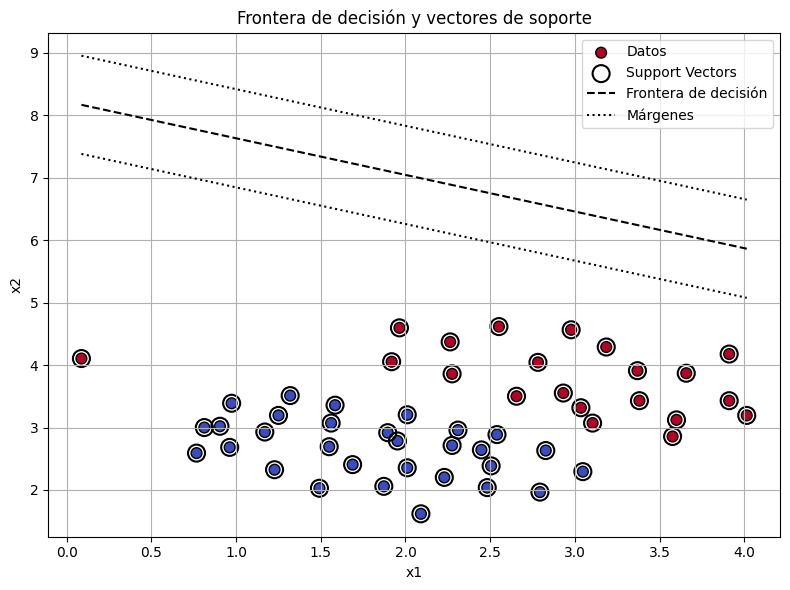

In [ ]:
# Graficar los puntos con colores por clase
plt.figure(figsize=(8, 6))
plt.scatter(X["x1"], X["x2"], c=y, cmap='coolwarm', edgecolors='k', s=60, label="Datos")

# Dibujar los vectores de soporte
plt.scatter(
    lin_svc.support_vectors_["x1"],
    lin_svc.support_vectors_["x2"],
    s=150, linewidth=1.5,
    facecolors='none', edgecolors='k',
    label="Support Vectors"
)

# Frontera de decisión: w1 * x1 + w2 * x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x_vals = np.linspace(X["x1"].min(), X["x1"].max(), 100)
w = lin_svc.coef_[0]
b = lin_svc.intercept_[0]
y_vals = -(w[0] * x_vals + b) / w[1]

# Margen positivo y negativo (x2 = -(w1*x + b ± 1)/w2)
margin = 1 / np.linalg.norm(w)
y_vals_pos = y_vals + margin
y_vals_neg = y_vals - margin

# Dibujar frontera y márgenes
plt.plot(x_vals, y_vals, 'k--', label="Frontera de decisión")
plt.plot(x_vals, y_vals_pos, 'k:', label="Márgenes")
plt.plot(x_vals, y_vals_neg, 'k:')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Frontera de decisión y vectores de soporte")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [ ]:
lin_svc = LinearSVC(C = 1000, loss='hinge', max_iter=10000)

In [ ]:
lin_svc.fit(X_scaled,y)

LinearSVC(C=1000, loss='hinge', max_iter=10000)

In [ ]:
accuracy = lin_svc.score(X_scaled, y)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Convert to unscaled parameters
b1 = lin_svc.decision_function([-scaler.mean_ / scaler.scale_])
w1 = lin_svc.coef_[0] / scaler.scale_
lin_svc.intercept_ = np.array([b1])
lin_svc.coef_ = np.array([w1])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
lin_svc.support_vectors_ = X[support_vectors_idx1]

C:\Users\inilo\AppData\Local\Temp\ipykernel_37260\3523636880.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()


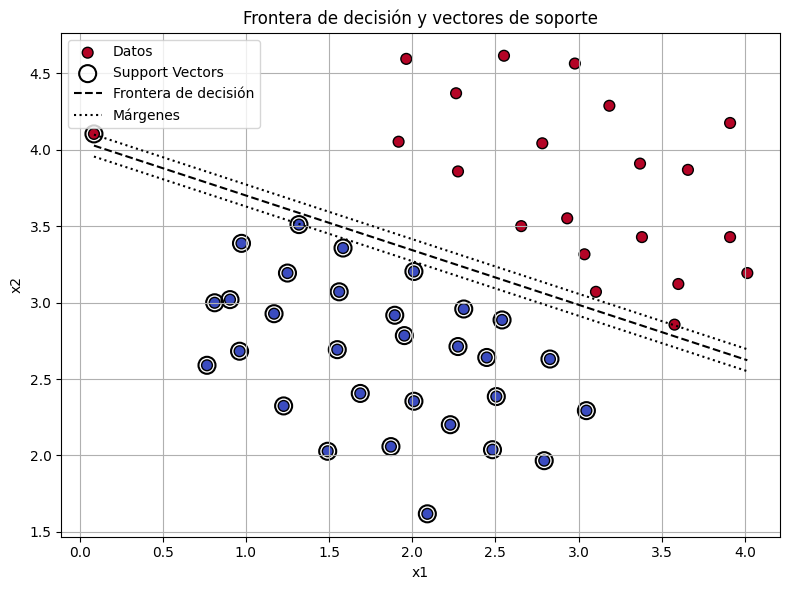

In [ ]:
# Graficar los puntos con colores por clase
plt.figure(figsize=(8, 6))
plt.scatter(X["x1"], X["x2"], c=y, cmap='coolwarm', edgecolors='k', s=60, label="Datos")

# Dibujar los vectores de soporte
plt.scatter(
    lin_svc.support_vectors_["x1"],
    lin_svc.support_vectors_["x2"],
    s=150, linewidth=1.5,
    facecolors='none', edgecolors='k',
    label="Support Vectors"
)

# Frontera de decisión: w1 * x1 + w2 * x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x_vals = np.linspace(X["x1"].min(), X["x1"].max(), 100)
w = lin_svc.coef_[0]
b = lin_svc.intercept_[0]
y_vals = -(w[0] * x_vals + b) / w[1]

# Margen positivo y negativo (x2 = -(w1*x + b ± 1)/w2)
margin = 1 / np.linalg.norm(w)
y_vals_pos = y_vals + margin
y_vals_neg = y_vals - margin

# Dibujar frontera y márgenes
plt.plot(x_vals, y_vals, 'k--', label="Frontera de decisión")
plt.plot(x_vals, y_vals_pos, 'k:', label="Márgenes")
plt.plot(x_vals, y_vals_neg, 'k:')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Frontera de decisión y vectores de soporte")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


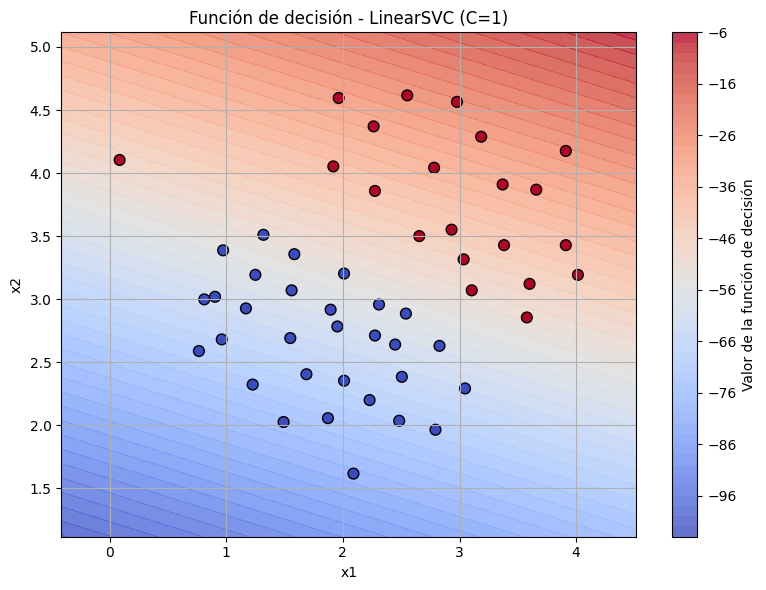

In [ ]:
# Crear una malla sobre el espacio de características original
x_min, x_max = X["x1"].min() - 0.5, X["x1"].max() + 0.5
y_min, y_max = X["x2"].min() - 0.5, X["x2"].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Convertir la malla a formato de predicción
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)  # escalar como los datos de entrenamiento

# Calcular la función de decisión
Z = lin_svc.decision_function(grid_scaled)
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))

# Mapa de calor de la función de decisión
contour = plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)

# Frontera de decisión (donde decision_function = 0)
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')

# Graficar los datos originales
plt.scatter(X["x1"], X["x2"], c=y, cmap='coolwarm', edgecolors='k', s=60)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Función de decisión - LinearSVC (C=1)")
plt.colorbar(contour, label='Valor de la función de decisión')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 9. Do the same with the second model

In [ ]:
lin_svc = LinearSVC(C = 1000, loss='hinge', max_iter=10000)

In [ ]:
lin_svc.fit(X_scaled,y)

LinearSVC(C=1000, loss='hinge', max_iter=10000)

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


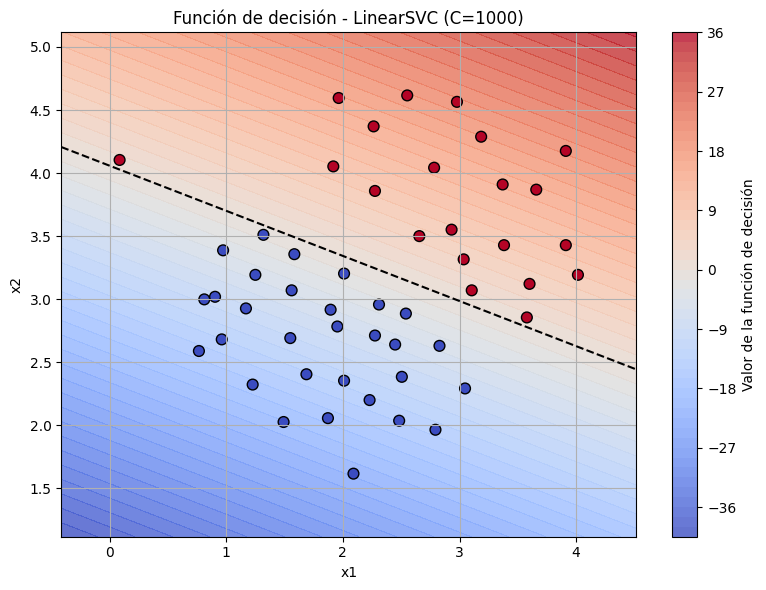

In [ ]:
# Crear una malla sobre el espacio de características original
x_min, x_max = X["x1"].min() - 0.5, X["x1"].max() + 0.5
y_min, y_max = X["x2"].min() - 0.5, X["x2"].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Convertir la malla a formato de predicción
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)  # escalar como los datos de entrenamiento

# Calcular la función de decisión
Z = lin_svc.decision_function(grid_scaled)
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))

# Mapa de calor de la función de decisión
contour = plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)

# Frontera de decisión (donde decision_function = 0)
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')

# Graficar los datos originales
plt.scatter(X["x1"], X["x2"], c=y, cmap='coolwarm', edgecolors='k', s=60)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Función de decisión - LinearSVC (C=1000)")
plt.colorbar(contour, label='Valor de la función de decisión')
plt.grid(True)
plt.tight_layout()
plt.show()

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

#### 1. Load the data `ejer_1_data2.mat`

In [ ]:
mat = scipy.io.loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]], shape=(863, 2)),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
    

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
mat["X"]

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]], shape=(863, 2))

In [ ]:
mat["y"]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

#### 2. Create a DataFrame with the features and target

In [ ]:
df = pd.DataFrame(mat["X"],columns=["x1","x2"])
df["target"] = mat["y"]

In [ ]:
df

,x1,x2,target
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


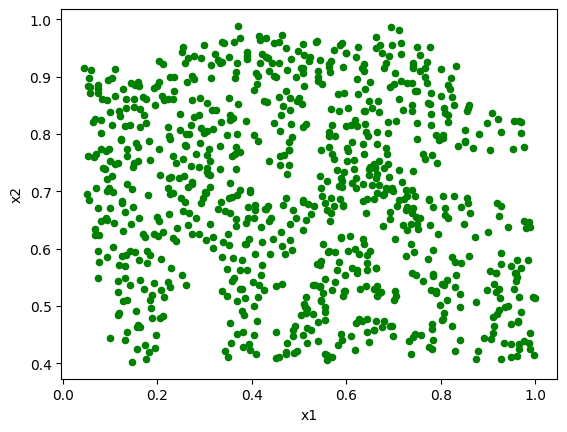

In [ ]:
ax = df.plot.scatter(x='x1', y='x2', c='green', colormap='viridis')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(C = 100, gamma = 10, probability = True)

#### 5. Fit the classifier and get the score

In [ ]:
X = df[["x1","x2"]]
y = df["target"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model_svc.fit(X,y)

SVC(C=100, gamma=10, probability=True)

In [ ]:
accuracy = model_svc.score(X_scaled, y)
print("Accuracy:", accuracy)

Accuracy: 0.6141367323290846


c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


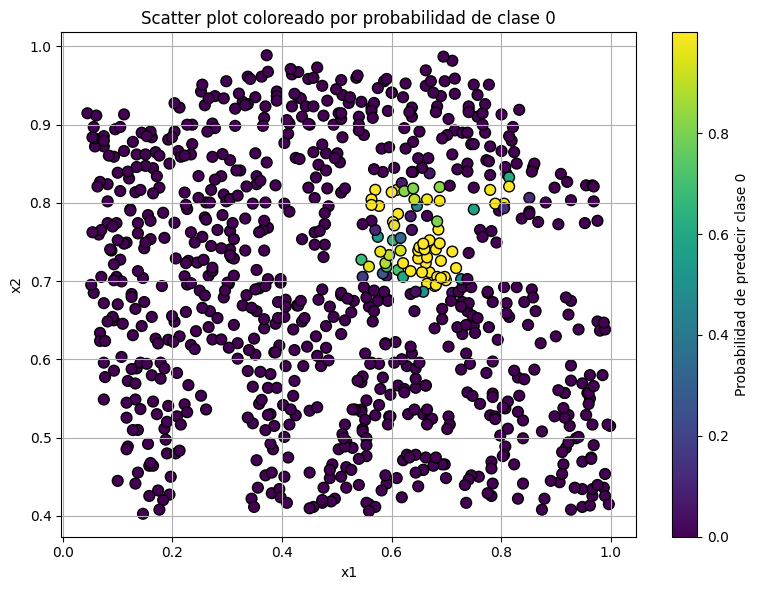

In [ ]:
# Obtener probabilidades de pertenencia a cada clase
probs = model_svc.predict_proba(X_scaled)[:, 0]  # Probabilidad de clase 0

# Crear scatter plot coloreado según probabilidad
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X["x1"], X["x2"], c=probs, cmap='viridis', edgecolors='k', s=60)

# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label("Probabilidad de predecir clase 0")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot coloreado por probabilidad de clase 0")
plt.grid(True)
plt.tight_layout()
plt.show()